## Building an optimized CNN Model for Morgan fingerprints

This Notebook will uses Keras Tuner to find the best hyperparameters for a CNN model which will label molecules according to their Morgan fingerprints

#### In case the requirements.txt file won't work

In [1]:
#pip install keras_tuner

### Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy import unique
from numpy import argmax
from keras_tuner import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [3]:
drugs = pd.read_pickle(os.path.join('res', 'pickles', 'all_label_drugs.pkl'))

In [4]:
drugs.head()

,CID,ATC_Code_Short,Molecule,ATC_Code_#,FeatInvariants,ConnInvariants,Morgan2FP,MACCSKeys,AtomPairFP,TopTorFP,AvalonFP,PubchemFP,CactvsFP
0,1,N,<rdkit.Chem.rdchem.Mol object at 0x0000018F230...,10,"[0, 0, 2, 2, 0, 0, 32, 2, 2, 0, 16, 0, 0, 0]","[2246728737, 2246699815, 864942730, 864674487,...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ..."
1,119,N,<rdkit.Chem.rdchem.Mol object at 0x0000018F230...,10,"[0, 0, 32, 2, 1, 0, 19]","[2245384272, 2245384272, 2246699815, 864942730...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, ..."
2,137,L,<rdkit.Chem.rdchem.Mol object at 0x0000018F230...,8,"[0, 0, 32, 2, 1, 0, 2, 0, 19]","[2245384272, 2245384272, 2246699815, 864942730...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, ..."
3,176,G,<rdkit.Chem.rdchem.Mol object at 0x0000018F230...,4,"[0, 32, 2, 1]","[2246728737, 2246699815, 864942730, 864662311]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, ..."
4,187,S,<rdkit.Chem.rdchem.Mol object at 0x0000018F231...,14,"[0, 0, 2, 2, 0, 0, 16, 0, 0, 0]","[2246728737, 2246699815, 864942730, 864674487,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ..."


### Prepare the data

In [5]:
drugs.columns

Index(['CID', 'ATC_Code_Short', 'Molecule', 'ATC_Code_#', 'FeatInvariants',
       'ConnInvariants', 'Morgan2FP', 'MACCSKeys', 'AtomPairFP', 'TopTorFP',
       'AvalonFP', 'PubchemFP', 'CactvsFP'],
      dtype='object')

We have found that Morgan fingerprints are the ones returning the best accuracy in a CNN model (look select_fingerprints.ipynb)

In [6]:
#Choose fingerprints to train with
X = drugs['TopTorFP']
y = drugs['ATC_Code_#']

In [7]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Reshaping the arrays to fit in the model
x_train = np.array(list(X_train))
x_test = np.array(list(X_test))
print('Shape x_train: ', x_train.shape)
n_classes = len(unique(y_train))
print('Number of classes: ', n_classes)
x_train= x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test= x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
print('Reshaped x_train: ', x_train.shape)
in_shape = x_train.shape[1:]
print('In_shape: ', in_shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Shape x_train:  (7128, 2048)
Number of classes:  16
Reshaped x_train:  (7128, 2048, 1)
In_shape:  (2048, 1)
(7128, 2048, 1) (7128,)
(3055, 2048, 1) (3055,)


In [9]:
Shape x_train:  (4854, 2048)
Number of classes:  12
Reshapep x_train:  (4854, 2048, 1)
In_shape:  (2048, 1)
(4854, 2048, 1) (4854,)
(2081, 2048, 1) (2081,)

SyntaxError: invalid syntax (2286720970.py, line 1)

### Tuning the model

Building the model

In [10]:
#model with tuner choosing number of layers

def build_model(hp):
    """
    Function that chooses the best hyperparameters for a CNN model and then compiles it.
    Input: a set of hyperparamneters
    Output: a cnn model
    """
    # Create model object
    model = keras.Sequential()
    # Choose number of layers
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(2048, 1)))
        model.add(layers.MaxPool1D(hp.Int('pool_size', min_value=2, max_value=6)))
        if hp.Boolean("dropout"):
            model.add(layers.Dropout(rate=0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu', kernel_initializer = 'he_uniform'
    ))

    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, activation='softmax'))

    # Compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

Tuning the model

In [21]:
tuner = RandomSearch(build_model,
                    objective='val_loss',
                    max_trials = 5,
                    directory = os.path.join('temp', 'tuner', 'RS_tuned_model', '230714_05'))
tuner.search(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 47s]
val_loss: 1.998681902885437

Best val_loss So Far: 1.196704387664795
Total elapsed time: 00h 03m 31s
INFO:tensorflow:Oracle triggered exit


Obtain and save the model

In [13]:
tuned_model = tuner.get_best_models(num_models=1)[0]
tuned_model.summary()
#tuned_model.save(os.path.join('compiled_models','tuned', 'opt_morgan_model'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2044, 64)          384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 681, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 43584)             0         
                                                                 
 dense (Dense)               (None, 32)                1394720   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                        

### Fit model and choose number of epochs

Set EarlyStopping and ModelCheckpoint to select a model with the optimal number of epochs

In [14]:
# Configure early stopping
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint(filepath = os.path.join('compiled_models','checkpoints', '{epoch:02d}-{val_accuracy:.3f}.hdf5'), monitor = 'val_loss', save_best_only = True)

# Fit the model
history = tuned_model.fit(x_train, y_train, epochs=200, batch_size=128, verbose=1, validation_split = 0.3, callbacks = [es,mc])

# Evaluate the model
loss, acc = tuned_model.evaluate(x_test, y_test, verbose=1)

Epoch 1/200
39/39 [==============================] - 4s 90ms/step - loss: 0.9643 - accuracy: 0.6631 - val_loss: 0.5891 - val_accuracy: 0.8242
Epoch 2/200
39/39 [==============================] - 3s 82ms/step - loss: 0.8997 - accuracy: 0.6831 - val_loss: 0.5860 - val_accuracy: 0.8298
Epoch 3/200
39/39 [==============================] - 3s 83ms/step - loss: 0.8574 - accuracy: 0.6933 - val_loss: 0.5846 - val_accuracy: 0.8214
Epoch 4/200
39/39 [==============================] - 3s 83ms/step - loss: 0.8294 - accuracy: 0.7046 - val_loss: 0.5853 - val_accuracy: 0.8247
Epoch 5/200
39/39 [==============================] - 3s 87ms/step - loss: 0.8221 - accuracy: 0.7019 - val_loss: 0.5846 - val_accuracy: 0.8195
Epoch 6/200
39/39 [==============================] - 3s 85ms/step - loss: 0.8036 - accuracy: 0.7068 - val_loss: 0.5889 - val_accuracy: 0.8228
Epoch 7/200
39/39 [==============================] - 3s 86ms/step - loss: 0.7984 - accuracy: 0.7164 - val_loss: 0.5986 - val_accuracy: 0.8153
Epoch 

In [15]:
# Getting test predictions
y_pred = tuned_model.predict(x_test)
y_pred_list = [argmax(x) for x in y_pred]

96/96 [==============================] - 1s 6ms/step


In [16]:
# Save predictions
y_pred_ser = pd.Series(y_pred_list)
y_pred_ser.to_pickle(path= os.path.join('predictions', 'y_preds.pkl'))

#### Visualization of models accuracy

In [17]:
# Precission and recall for every variable
print(metrics.classification_report(y_test,y_pred_list))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60       223
           1       0.59      0.55      0.57       139
           2       0.69      0.67      0.68       343
           3       0.55      0.26      0.35       115
           4       0.76      0.62      0.68       110
           5       0.85      0.44      0.58        39
           6       0.55      0.63      0.58        67
           7       0.79      0.86      0.82       776
           8       0.69      0.77      0.73       425
           9       0.74      0.22      0.34        63
          10       0.59      0.78      0.67       417
          11       0.81      0.63      0.71        54
          12       0.67      0.33      0.44        42
          13       0.62      0.40      0.48        91
          14       0.90      0.37      0.53        51
          15       0.79      0.48      0.60       100

    accuracy                           0.68      3055
   macro avg       0.70   

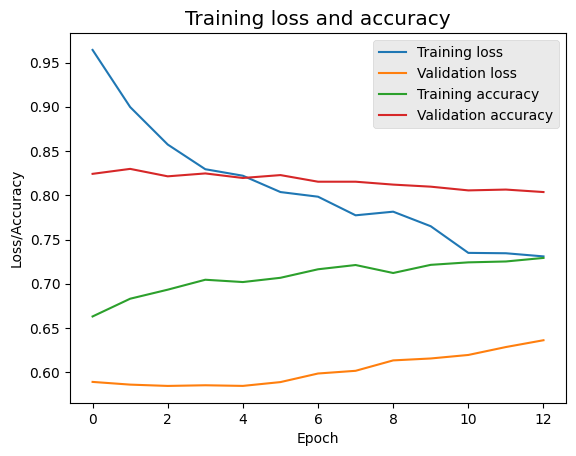

In [18]:
#Learning curve visualization

fig,ax = plt.subplots()
plt.style.use('ggplot')

epochs = len(history.history['loss'])
epoch_values = list(range(epochs))

ax.plot(epoch_values, history.history['loss'], label='Training loss')
ax.plot(epoch_values, history.history['val_loss'], label='Validation loss')
ax.plot(epoch_values, history.history['accuracy'], label='Training accuracy')
ax.plot(epoch_values, history.history['val_accuracy'], label='Validation accuracy')

ax.set_title('Training loss and accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss/Accuracy')
ax.legend()
plt.show()

In [37]:
loaded_model = load_model(os.path.join('compiled_models','checkpoints', '04-0.991.hdf5'))

In [38]:
y_pred = loaded_model.predict(x_test)
y_pred_list = [argmax(x) for x in y_pred]

66/66 [==============================] - 2s 26ms/step


In [39]:
print(metrics.classification_report(y_test,y_pred_list))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       721
           1       0.81      0.82      0.82        95
           2       0.78      0.78      0.78       372
           3       0.74      0.73      0.74       232
           4       0.70      0.83      0.76       341
           5       0.68      0.48      0.57        27
           6       0.94      0.68      0.79        75
           7       0.77      0.55      0.64        85
           8       0.93      0.66      0.77        56
           9       0.88      0.90      0.89        39
          10       0.94      0.53      0.68        32
          11       1.00      0.33      0.50         6

    accuracy                           0.80      2081
   macro avg       0.84      0.68      0.73      2081
weighted avg       0.81      0.80      0.80      2081

